# Perception Fused Iterative Tomography Reconstruction Engine (PFITRE)

## Install PFITRE and other dependencies
- To run this code, please setup environment with yml file shared in the Github. The packages needed are tomopy, pytorch and astra
- The utils and PFITRE_net files needs to be downloaded from Github: https://github.com/chonghangzhao/PFITRE
- The model weight can be downloaded here: https://drive.google.com/file/d/1rqop4dAZ5QSjZluPkQnnMj5Qkmn5gtKo/view?usp=drive_link

## Use GPU Acceleration
If you are running this notebook in Google Colab, navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save. This will ensure your notebook uses a GPU, which will significantly speed up model training times.


## Steps in this Demo:
- Setup environment
- Load example data & Model
- One time correction with trained model
- Iterative correction with PFITRE

# **Setup Environment**

In [2]:
# Repo klonen
!git clone https://github.com/chonghangzhao/PFITRE.git
%cd PFITRE

Cloning into 'PFITRE'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 184 (delta 61), reused 29 (delta 29), pack-reused 105 (from 1)
Receiving objects: 100% (184/184), 38.27 MiB | 30.38 MiB/s, done.
Resolving deltas: 100% (76/76), done.
/content/PFITRE


In [3]:
# 🚀 3. Notwendige Pakete installieren
!pip install torch torchvision torchaudio
!pip install tomopy
!pip install astra-toolbox
!pip install tifffile scikit-image pandas tqdm matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [4]:
import sys
import os

#### the folder you saved utils and PFITRE_net, and model weight
sys.path.append('/content/PFITRE')
os.chdir('/content/PFITRE')

In [5]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...


In [6]:
!conda install conda-forge::tomopy

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda-forge::tomopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |       3_kmp_llvm           7 KB  conda-forge
    aom-3.9.1                  |       hac33072_0         2.6 MB  conda-forge
    blosc-1.21.6               |       he440d0b_1          47 KB  conda-forge
    brotli-1.1.0               |       hb9d3cd8_2          19 KB  conda-forge
    brotli-bin-1.1.0           |       hb9d3cd8_2          18 KB  conda-forge
    brunsli-0.1                |       h9c3ff4c_0         200 KB  conda-forge
    c-blosc2-2.15.2            |       h3122c55_1         334 KB  conda-forge
    ca-certificates-2025.8.3   |       hbd8a1cb_0         151 KB  conda-forge
    certifi-2025.8.3           |    

In [7]:
!conda install astra-toolbox -c astra-toolbox -c nvidia

Channels:
 - astra-toolbox
 - nvidia
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - astra-toolbox


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    astra-toolbox-2.4.0        |  py311h14163b8_0         454 KB  astra-toolbox
    cuda-cudart-11.8.89        |                0         197 KB  nvidia
    libastra-2.4.0             |      cuda_11.8_0         6.2 MB  astra-toolbox
    libcufft-10.9.0.58         |                0       142.8 MB  nvidia
    ------------------------------------------------------------
                                           Total:       149.6 MB

The fol

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%cd PFITRE
from utils import *
from PFITRE_Net import PFITRE_net

import numpy as np
import pandas as pd
import tifffile as tf

%matplotlib inline

/content/PFITRE


In [6]:
!pip install -q gdown
!gdown --id 1rqop4dAZ5QSjZluPkQnnMj5Qkmn5gtKo

/usr/local/lib/python3.11/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1rqop4dAZ5QSjZluPkQnnMj5Qkmn5gtKo
From (redirected): https://drive.google.com/uc?id=1rqop4dAZ5QSjZluPkQnnMj5Qkmn5gtKo&confirm=t&uuid=4e4e93f4-7627-4d3d-be0f-deb49bab893b
To: /content/PFITRE/ckpt_PFITRE.pth
100% 362M/362M [00:03<00:00, 104MB/s]


# **Load Model**


In [7]:
import torch
Model = PFITRE_net()
model_weights_path = '/content/PFITRE/ckpt_PFITRE.pth'

# Nur den state_dict laden
checkpoint = torch.load(model_weights_path, map_location='cuda')  # oder 'cpu' falls kein GPU
state_dict = checkpoint['net_state_dict']  # <-- hier nur die Gewichte extrahieren

# In das Modell laden
Model.load_state_dict(state_dict)
Model.eval()  # auf Evaluation setzen, falls du Inferenz machen willst


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|██████████| 507M/507M [00:10<00:00, 49.9MB/s]


PFITRE_net(
  (pool1): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
  (pool2): Conv2d(128, 128, kernel_size=(2, 2), stride=(2, 2))
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), p

# **Load Image**

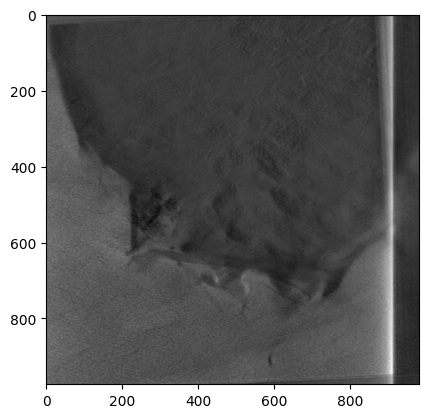

In [15]:
from skimage import io

## load image with artifacts for testing
img_input = tf.imread("./457.tif")

plt.imshow(img_input, cmap='gray')

# **One Time Correction - Post Processing**

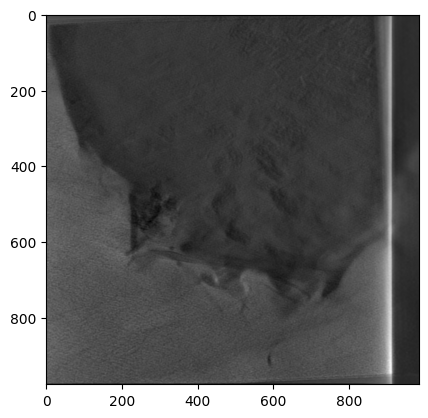

In [16]:
## NN_PostCorrect is used for one time post correction for 2D images or RGB format images.

## The input images need to be normalized. If there is no pixel with extreme outlier intensity
## rescale and normalize the image based on absolute max and min within this image, using 'self'.

model_output = NN_PostCorrect(img_input, Model, norm="self")

plt.imshow(model_output, cmap='gray')

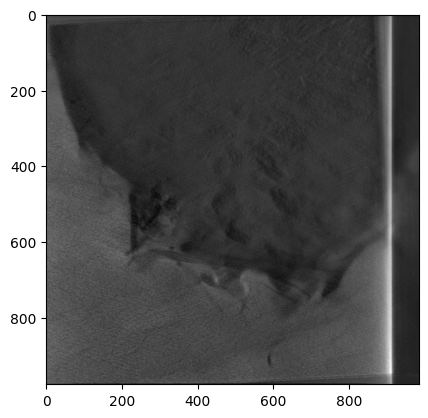

In [17]:
## 2. rescale based on percentile value in a image

## To prevent effect of outlier on rescale and normalization, use percentile value to replace absolute max and min value
## This is usually used for preventing the effect of outlier pixel problem
## e.g. norm_quant = 0.01, the adjusted max value is the value at 99% quantile, and adjusted min is the value at 1% quantile
## similarly, norm_quant = 0.02, the adjusted max value is the value at 98% quantile, and adjusted min is the value at 2% quantile

model_output = NN_PostCorrect(img_input, Model, norm="self_quant", norm_quant = 0.02)

plt.imshow(model_output, cmap='gray')

# **Iterative correction with PFITRE on 2D image**

In [25]:
!pip install mrcfile tifffile
import mrcfile, tifffile

with mrcfile.open("tomo01_norm_deconv_k_0.05_ali_xpy.mrc") as mrc:
    data = mrc.data  # should be (Z, Y, X)

print(data.shape)  # verify it’s 3D
tifffile.imwrite("tomo01_norm_deconv_k_0.05_ali_xpy.tif", data.astype("float32"))


(111, 974, 984)


In [26]:
img = tifffile.imread("tomo01_norm_deconv_k_0.05_ali_xpy.tif")
print("Shape of TIFF data:", img.shape)

Shape of TIFF data: (111, 974, 984)


100%|██████████| 5/5 [01:01<00:00, 12.40s/it]


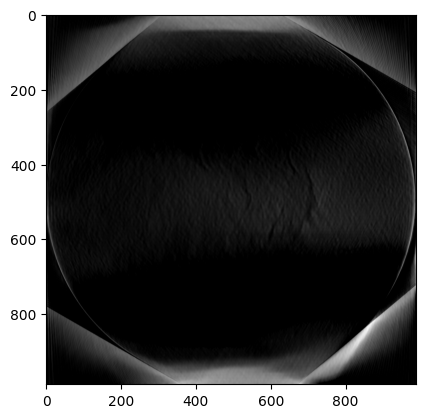

In [56]:
## recon_ADMM_NN_TV is used for iterative correction on 2D images

#Model = PFITRE_net()
#model_weights_path = '/content/PFITRE/ckpt_PFITRE.pth'

## load weight for pretrained network
#Model = NN_load(Model, model_weights_path)

#################


## Experimental result 1
sinogram_input_limited = tf.imread("./tomo01_norm_deconv_k_0.05_ali_xpy.tif")[:,430,:]
angle_list_limited = np.array(pd.read_csv('./angles.csv')['angle'])
theta_limited = np.array(angle_list_limited/180*np.pi)

## recon is the result from the final iteration, and x_list saved correction after each iteration
recon, x_list = recon_ADMM_NN_TV(sinogram_input_limited, theta_limited, Model, iter_num=5, ADMM_rho_const=20, cor_shift=-0.5, initial=None, mask_boundary=False, mask_ratio=0.95, norm_quant=0.05, TV=True)


plt.imshow(recon, cmap='gray')

In [54]:
print(recon.shape)

(988, 988)


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


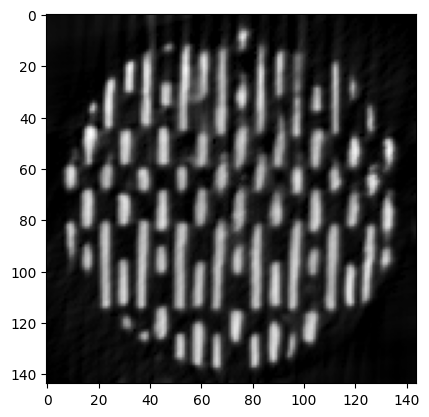

In [39]:
## Experimental result 2
sinogram_input_limited = tf.imread("./Demo/Experimental data/Cu_example_22_LimitedAngle.tiff")[:,90,:]
angle_list_limited = np.array(pd.read_csv('./Demo/Experimental data/Cu_example_22_LimitedAngle.csv')['angle'])
theta_limited = np.array(angle_list_limited/180*np.pi)

## recon is the result from the final iteration, and x_list saved correction after each iteration
recon, x_list = recon_ADMM_NN_TV(sinogram_input_limited, theta_limited, Model, iter_num=10, ADMM_rho_const=25, cor_shift=-0.5, initial=None, mask_boundary=False, mask_ratio=0.95, norm_quant=False, TV=True)

plt.imshow(recon, cmap='gray')

100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


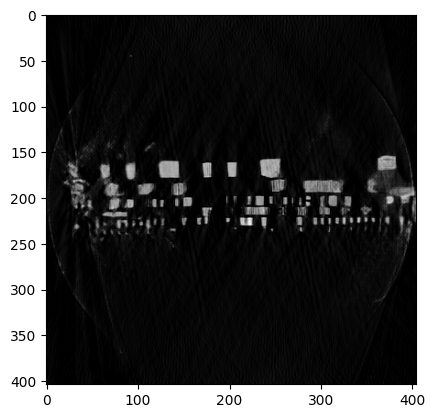

In [40]:
## Experimental result 3
sinogram_input_limited = tf.imread("./Demo/Experimental data/Cu_example_24_LimitedAngle.tiff")[:,40,:]
angle_list_limited = np.array(pd.read_csv('./Demo/Experimental data/Cu_example_24_LimitedAngle.csv')['angle'])
theta_limited = np.array(angle_list_limited/180*np.pi)

## recon is the result from the final iteration, and x_list saved correction after each iteration
recon, x_list = recon_ADMM_NN_TV(sinogram_input_limited, theta_limited, Model, iter_num=10, ADMM_rho_const=25, cor_shift=-0.5, initial=None, mask_boundary=False, mask_ratio=0.95, norm_quant=False, TV=False)

plt.imshow(recon, cmap='gray')

# **Iterative correction with PFITRE on 3D image stack**

In [39]:
sinogram_input_limited3D = tf.imread("./tomo01_norm_deconv_k_0.05_ali_xpy.tif")
angle_list_limited = np.array(pd.read_csv('./angles.csv')['angle'])
theta_limited = np.array(angle_list_limited/180*np.pi)


recon_3d =[]
## iteratively process each slide within 3D image stack
## apply recon_ADMM_NN_TV to each slide

for i in range(405,410):

    sinogram_input_limited_slide = sinogram_input_limited3D[:,i,:]

    recon, x_list = recon_ADMM_NN_TV(sinogram_input_limited_slide, theta_limited, Model, iter_num=5, ADMM_rho_const=25, cor_shift=-0.5, initial=None, mask_boundary=False, mask_ratio=0.95, norm_quant=False, TV=False)
    recon_3d.append(recon)

recon_3dy = np.float32(np.array(recon_3d))

100%|██████████| 5/5 [00:55<00:00, 11.15s/it]


In [50]:
#plt.imshow(recon_3d, cmap='gray')
print(x_list.shape)
#plt.imshow(recon_3d[4,:,:], cmap='gray')

AttributeError: 'list' object has no attribute 'shape'